In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
d2=pd.read_csv('sales channel.csv')
d2.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
#there are 3 attributes named -tv,radio and newspaper .and output is sales.

In [3]:
d2.isnull().sum()

 TV          0
radio        0
newspaper    0
sales        0
dtype: int64

In [4]:
#there are no null values 

In [5]:
d2.shape

(200, 4)

In [6]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0    TV        200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [7]:
d2.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
#there are 200 rows,median is higher than mean for tv,so it is left skewed data
#there is little difference between 75% and max for tv and newspaper.so there are chences for the presence of outliers.

In [9]:
d2cor=d2.corr()
d2cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


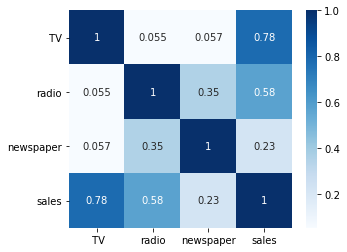

In [10]:
plt.figure(figsize=(5,4))
sns.heatmap(d2cor,cmap='Blues',annot=True)

In [11]:
#sales only has positive correlation with tv,radio and newspaper.
#sales has better correlation with tv and less correlation with newspaper

In [17]:
collist=d2.columns.values
ncol=9
nrows=7

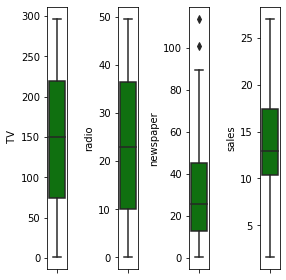

In [18]:
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d2[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [ ]:
#there are some outliers in newspaper column

In [19]:
d2.skew()

 TV         -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

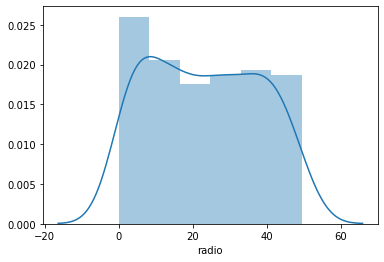

In [20]:
sns.distplot(d2['radio'])

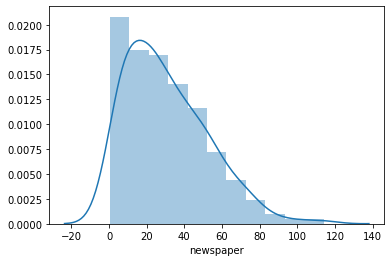

In [21]:
sns.distplot(d2['newspaper'])

In [23]:
for col in d2.columns:
    if d2.skew().loc[col]>0.55:
        d2[col]=np.log1p(d2[col])

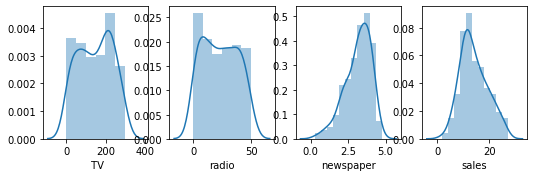

In [24]:
plt.figure(figsize=(20,20))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d2[collist[i]])

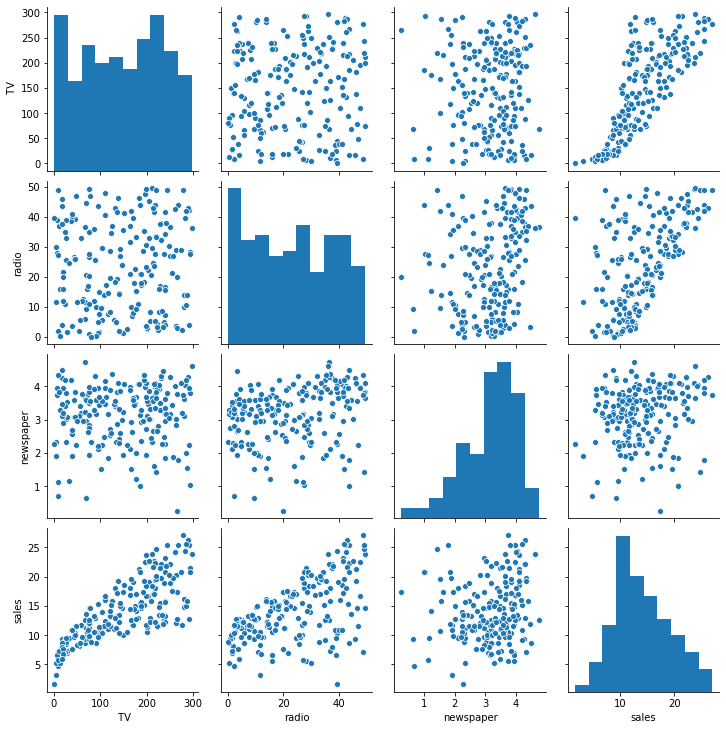

In [25]:
sns.pairplot(d2)

In [ ]:
#sales on tv is more concentrated towards the goodness of fit line
#sales on newspaper is scattered
#therfore  tv will be the right channel to improve sales

In [26]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(d2))
z

array([[9.69852266e-01, 9.81522472e-01, 1.27054817e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 7.84008452e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.27219508e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.07922051e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.07727442e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 1.36239293e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 5.26522686e-02, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 7.16694174e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 2.84612391e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 6.14011337e-02, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 8.52446540e-02, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.78601844e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.21484164e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.21367806e

In [27]:
threshold=3
print(np.where(z>3))

(array([33], dtype=int64), array([2], dtype=int64))


In [28]:
d2_new=d2[(z<3).all(axis=1)]
print(d2.shape)
print(d2_new.shape)

(200, 4)
(199, 4)


In [29]:
#1 row is deleted due to outliers

In [30]:
x=d2_new.iloc[:,0:-1]
x.head()

,TV,radio,newspaper
1,230.1,37.8,4.251348
2,44.5,39.3,3.830813
3,17.2,45.9,4.252772
4,151.5,41.3,4.085976
5,180.8,10.8,4.084294


In [31]:
y=d2_new.iloc[:,-1]
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [32]:
max_r_score=0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 90 is 0.9428082768842401


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=90)

In [34]:
x_train.shape

(155, 3)

In [35]:
x_test.shape

(44, 3)

In [36]:
y_train.shape

(155,)

In [37]:
y_test.shape

(44,)

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 9.79089948e-01,  9.78080220e-01,  1.28730630e+00],
       [-1.19319934e+00,  1.07912436e+00,  7.87741098e-01],
       [-1.51272249e+00,  1.52371859e+00,  1.28899730e+00],
       [ 5.91441612e-02,  1.21384989e+00,  1.09085648e+00],
       [ 4.02075606e-01, -8.40714347e-01,  1.08885829e+00],
       [-1.61220773e+00,  1.72580688e+00,  1.38160990e+00],
       [-1.04104546e+00,  6.41266412e-01,  3.68052853e-02],
       [-3.07195573e-01, -2.47922044e-01, -7.53137850e-01],
       [-1.61337814e+00, -1.42677037e+00, -2.93957598e+00],
       [ 6.24454358e-01, -1.39308899e+00, -8.03015175e-02],
       [-9.40389811e-01, -1.17752816e+00,  7.02702235e-02],
       [ 7.98846117e-01,  4.84741080e-02, -1.85108972e+00],
       [-1.43547514e+00,  7.96200764e-01,  1.23010841e+00],
       [-5.72879662e-01, -1.05627519e+00, -1.26342682e+00],
       [ 6.74782181e-01,  6.48002688e-01,  8.10709248e-01],
       [ 5.72956121e-01,  1.64497156e+00,  9.73434870e-01],
       [-9.20492764e-01,  8.97244906e-01

In [39]:
lm=LinearRegression()

In [40]:
lm.fit(x_train,y_train)

LinearRegression()

In [41]:
lm.coef_

array([0.04584856, 0.18229675, 0.06378914])

In [42]:
lm.intercept_

2.786452216027671

In [43]:
lm.score(x_train,y_train)

0.8860766523834641

In [44]:
pred=lm.predict(x_test)
print('predicted strength:',pred)
print('actual strength:',y_test)

predicted strength: [15.29209375 14.8046551  10.1634715  14.89235096 23.71397206 22.80718405
 20.33555128 16.78694435 20.69515204 20.9985811  21.36288884 23.12232615
 16.28843549  9.71224935 12.86972098 16.30851914 20.64030772 12.23533982
  9.14555046 11.6061186  18.18780187 11.75834394 11.47858645 14.90342695
  9.17822701 13.40823652  5.38425324  8.77636332 16.81624621  8.48271278
 11.98470222 19.3362756  20.86549461  7.53362306 13.4918239  15.27297103
 16.5452036  12.24073528  9.98593375 16.35826504  9.71156105 14.93317917
 13.77177879 12.03208813]
actual strength: 98     15.5
22     12.5
83     11.3
111    13.4
199    25.5
62     24.2
40     21.5
90     16.7
16     22.4
112    21.8
43     20.7
37     25.4
96     16.9
146    10.3
17     12.5
114    15.9
85     21.7
2      10.4
126    10.6
7      11.8
194    19.6
89     12.9
87     12.0
124    15.2
30     10.5
168    12.2
196     7.6
14      9.7
65     18.0
57      5.5
117    12.2
29     18.9
138    20.8
173     7.6
162    13.3
157   

In [45]:
print('error:')
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 0.9898289228889738
mean squared error: 1.5118526120036575
root mean squared error: 1.2295741588060711


In [46]:
print(r2_score(y_test,pred))

0.9367431563937997


In [47]:
from sklearn.model_selection import cross_val_score
lmscores=cross_val_score(lm,x,y,cv=5)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[0.87888883 0.91835061 0.92756994 0.81688795 0.89430545]
0.8872005567864953 0.039149558569899504


In [48]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [49]:
from sklearn .linear_model import Lasso,Ridge, ElasticNet
ls=Lasso(alpha=.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.8860766016286181

In [50]:
ls.coef_

array([0.0458497 , 0.18231228, 0.06236344])

In [51]:
lscores=cross_val_score(ls,x,y,cv=5)
print(lscores)
print(lscores.mean(),lscores.std())

[0.87893109 0.9183462  0.92762958 0.81692747 0.89431184]
0.8872292359115368 0.039145403604411676


In [52]:
rd=Ridge(alpha=.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.8860766523834641

In [53]:
rd.coef_

array([0.04584856, 0.18229675, 0.06378908])

In [54]:
rdscores=cross_val_score(rd,x,y,cv=5)
print(rdscores)
print(rdscores.mean(),rdscores.std())

[0.87888884 0.91835057 0.92757005 0.81688788 0.8943055 ]
0.8872005679806072 0.039149603062613


In [55]:
enr=ElasticNet(alpha=.001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.886076638081434


array([0.04584917, 0.1823047 , 0.06303263])

In [56]:
enrscores=cross_val_score(enr,x,y,cv=5)
print(enrscores)
print(enrscores.mean(),enrscores.std())

[0.87891328 0.91831565 0.92769158 0.81685161 0.89434639]
0.8872237016054356 0.039182612139761056


In [57]:
import joblib
joblib.dump(enr,'enr_sales channel.pkl')

['enr_sales channel.pkl']